<a href="https://colab.research.google.com/github/kyoungyi/Small-Projects/blob/master/all_county_corn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install cftime
import xarray as xr
import numpy as np
import pandas as pd
import scipy.io
from itertools import zip_longest


     |████████████████████████████████| 296kB 4.8MB/s 


# 1. Crop Data
</li> source: USDA NASS () </li>
<li> temporal period: 1919 ~ 2019 (lots of data are missing depending on crop) </li>
<li> spatial scale: county level (data availability is different depending on crop) </li>
<li> note: </li>
 <ul> <li> yield: both rainfed and irrigated (unit:bu/acre) </li>
 <li> area: harvest area (unit:acre) </li> </ul> 
<li> note: missing data as zero </li>



In [ ]:
data = scipy.io.loadmat('/content/drive/My Drive/all_crops_LLSupdated07282020_statesAndCounties.mat', squeeze_me=True)
county = data['st']['c']
#a.dtype.names
crop_names = county[0].dtype.names

In [ ]:
#time = xr.cftime_range(start="1910-01-01", periods=110, freq="1Y", calendar='noleap')
#time.year

time1 = pd.date_range(start="1910-01-01", periods=110, freq="1Y")
time1.year


Int64Index([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
            ...
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', length=110)

In [ ]:
no_data_state = []
no_data_county= []
for i in range(len(county)): #len(county)
  for j in range(len(county[i])): #len(county[i])
    if len(np.atleast_1d(county[i]['corn_yld_yrs'][j])) != 0 or len(np.atleast_1d(county[i]['corn_area_yrs'][j])) !=0:
      corn_yr = np.atleast_1d(county[i]['corn_yld_yrs'][j]) #.astype('int64')
      corn_yld = np.atleast_1d(county[i]['corn_yld'][j]) #.astype('int64')
      corn_area_yr =np.atleast_1d(county[i]['corn_area_yrs'][j]) #.astype('int64')
      corn_area = np.atleast_1d(county[i]['corn_area'][j]) #.astype('int64')
      temp1  = np.zeros([110])
      temp2 = np.zeros([110])
      index1 = []
      index2 = []
      idx1 = 0
      idx2 = 0
      print(i,j)
      for z,k in zip_longest(corn_yr,corn_area_yr):
        if z != None:
          idx1 = np.where(list(time.year) == z)
          index1.append(idx1)
        if k != None:
          idx2= np.where(list(time.year) == k)
          index2.append(idx2)
      #print(np.ravel(index1), np.ravel(index2))
      if len(corn_yr) !=0:
        temp1[np.ravel(index1)] = corn_yld
      if len(corn_area_yr) !=0:
        temp2[np.ravel(index2)] = corn_area
      #print(temp1[np.ravel(index1)], corn_yld,county[i]["mLat"][j])

      # Saving: change from dict to dataframe
      my_dict = dict(state_name=data['st']['name'][i],state_id=data['st']['FIPS'][i],
                    county_name=county[i]['name'][j],county_id=county[i]['ID'][j],
                    lat=county[i]["mLat"][j],lon=county[i]["mLon"][j],
                    year=time1,corn_yld=temp1,corn_area=temp2)
      dataframe_temp = pd.DataFrame.from_dict(my_dict)
      
      if i == 0 and j == 0:
        dataframe = dataframe_temp
      else:
        dataframe = dataframe.append(dataframe_temp,ignore_index=True, sort=False)
    
    else:
      no_data_county.append(j)
      no_data_state.append(i)
      print('no data: ',i,j)




0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
3 0
no data:  3 1
3 2
3 3
3 4
3 5
3 6
no data:  3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
no data:  3 20
no data:  3 21
3 22
3 23
3 24
no data:  3 25
3 26
3 27
no data:  3 28
3 29
3 30
no data:  3 31
3 32
3 33
3 34
3 35
3 36


In [ ]:
len(no_data_county), len(np.unique(dataframe['lat'])), 277 + 2831 #no_data_county

(277, 2831, 3108)

In [ ]:
pd.to_datetime('1981')

In [ ]:
dataframe.loc[(dataframe['year'] > pd.to_datetime('1980')) & (dataframe['year'] < pd.to_datetime('2019'))]

,state_name,state_id,county_name,county_id,lat,lon,year,corn_yld,corn_area
70,AL,1,Autauga,1,32.462991,-86.709691,1980-12-31,20.8,6600.0
71,AL,1,Autauga,1,32.462991,-86.709691,1981-12-31,17.3,5200.0
72,AL,1,Autauga,1,32.462991,-86.709691,1982-12-31,59.1,2200.0
73,AL,1,Autauga,1,32.462991,-86.709691,1983-12-31,38.0,2000.0
74,AL,1,Autauga,1,32.462991,-86.709691,1984-12-31,41.2,2500.0
...,...,...,...,...,...,...,...,...,...
311404,WY,56,Weston,45,43.802767,-104.596909,2014-12-31,0.0,0.0
311405,WY,56,Weston,45,43.802767,-104.596909,2015-12-31,0.0,0.0
311406,WY,56,Weston,45,43.802767,-104.596909,2016-12-31,0.0,0.0
311407,WY,56,Weston,45,43.802767,-104.596909,2017-12-31,0.0,0.0


In [ ]:
dataframe.to_csv('/content/drive/My Drive/state_county_corn_pd_date.csv')

In [2]:
dataframe = pd.read_csv('/content/drive/My Drive/state_county_corn_pd_date.csv', index_col=[0])

In [4]:
dataframe

,state_name,state_id,county_name,county_id,lat,lon,year,corn_yld,corn_area
0,AL,1,Autauga,1,32.462991,-86.709691,1910-12-31,0.0,0.0
1,AL,1,Autauga,1,32.462991,-86.709691,1911-12-31,0.0,0.0
2,AL,1,Autauga,1,32.462991,-86.709691,1912-12-31,0.0,0.0
3,AL,1,Autauga,1,32.462991,-86.709691,1913-12-31,0.0,0.0
4,AL,1,Autauga,1,32.462991,-86.709691,1914-12-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...
311405,WY,56,Weston,45,43.802767,-104.596909,2015-12-31,0.0,0.0
311406,WY,56,Weston,45,43.802767,-104.596909,2016-12-31,0.0,0.0
311407,WY,56,Weston,45,43.802767,-104.596909,2017-12-31,0.0,0.0
311408,WY,56,Weston,45,43.802767,-104.596909,2018-12-31,0.0,0.0


# 2. PRISM Data with Shape file
### 2-1. Prism Data (2 variables)
<li> PRISM is a set of monthly, yearly, and single-event gridded data products of mean temperature and precipitation, max/min temperatures, and dewpoints, primarily for the United States. In-situ point measurements are ingested into the PRISM (Parameter elevation Regression on Independent Slopes Model) statistical mapping system. </li>
<li> source: PRISM () </li>
<li> temporal period: 1981~2016 (36yrs) - montly intervals </li>
<li> spatial scale: county level - 3220 counties (2.5 arcmin (4 km) resolution) ** Climatologies (normals) are available at 30-arcsec (800 meters) </li>
<li> temperature: tmean = avg. tmax, tmin (unit: celius) - shape: (3220,36) </li>
<li> precipitation: accumul monthly precip (unit: mm) - shape: (3220,36)</li>
<li> note: compared to crop data, there are more data available. crop data has a total of 3108 counties. </li>
<li> note: spatial coordinates follow cb_2016_us_county_20m/cb_2016_us_county_20m.shp. This is GIS file with polygon and multipolygon. I extracted the central coordinates out of them which seem similar to the representative coordinates of USDA-NASS crop data. </li>
<li> note: missing data as nan </li>

## 2-2. Shapefile (state id, county id, coordinates info to match with PRISM data)
<li> GIS file </li>
<li> The order is the same as the order of PRISM data </li>


In [9]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 972kB 5.2MB/s 
     |████████████████████████████████| 10.9MB 28.9MB/s 
     |████████████████████████████████| 14.8MB 310kB/s 


##2-1. prism data
 For nan values, I treated counties whose months are nan as unavailable counties. 

In [3]:
mon_temp = scipy.io.loadmat('/content/drive/My Drive/ASCI Lab Data/USCountyDataSummaries/Monthly/tdmean_prism.mat')
mon_precip = scipy.io.loadmat('/content/drive/My Drive/ASCI Lab Data/USCountyDataSummaries/Monthly/ppt_prism.mat')

#data structure
np.shape(mon_temp['tdmean_prism']), np.shape(mon_precip['ppt_prism']), mon_temp['year_list']

((3220, 12, 36),
 (3220, 12, 36),
 array([[1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
         1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
         2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
         2014, 2015, 2016]], dtype=uint16))

In [32]:
time1 = pd.date_range(start="1981-01-01", end='2017-01-01', freq="1Y")
time1

DatetimeIndex(['1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
               '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31',
               '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31',
               '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31',
               '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [35]:
# any nan values? => check with Lindsey (Counties from Alaska, Hawaii, Puerto Rico are missing)
print(len(np.where(np.isnan(mon_temp['tdmean_prism']) == True)[0]))
print(np.where(np.isnan(mon_temp['tdmean_prism']) == True))
print(np.where(np.isnan(mon_precip['ppt_prism'])==True))

49248
(array([   3,    3,    3, ..., 3203, 3203, 3203]), array([ 0,  0,  0, ..., 11, 11, 11]), array([ 0,  1,  2, ..., 33, 34, 35]))
(array([   3,    3,    3, ..., 3203, 3203, 3203]), array([ 0,  0,  0, ..., 11, 11, 11]), array([ 0,  1,  2, ..., 33, 34, 35]))


## 2-2. shape data

In [10]:
lonlatinfo = gpd.read_file("/content/drive/My Drive/ASCI Lab Data/USCountyDataSummaries/cb_2016_us_county_20m/cb_2016_us_county_20m.shp")
lonlatinfo.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,131,01074078,0500000US39131,39131,Pike,06,1140324458,9567612,"POLYGON ((-83.35353 39.19758, -82.78589 39.168..."
1,46,003,01266983,0500000US46003,46003,Aurora,06,1834813753,11201379,"POLYGON ((-98.80777 43.93522, -98.33151 43.937..."
2,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857..."
3,72,145,01804553,0500000US72145,72145,Vega Baja,13,118766803,57805868,"POLYGON ((-66.44899 18.38721, -66.43895 18.481..."
4,48,259,01383915,0500000US48259,48259,Kendall,06,1715747531,1496797,"POLYGON ((-98.92015 30.13829, -98.58790 30.138..."


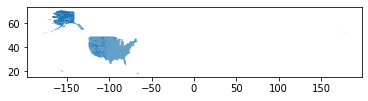

In [39]:
lonlatinfo.geometry.plot()

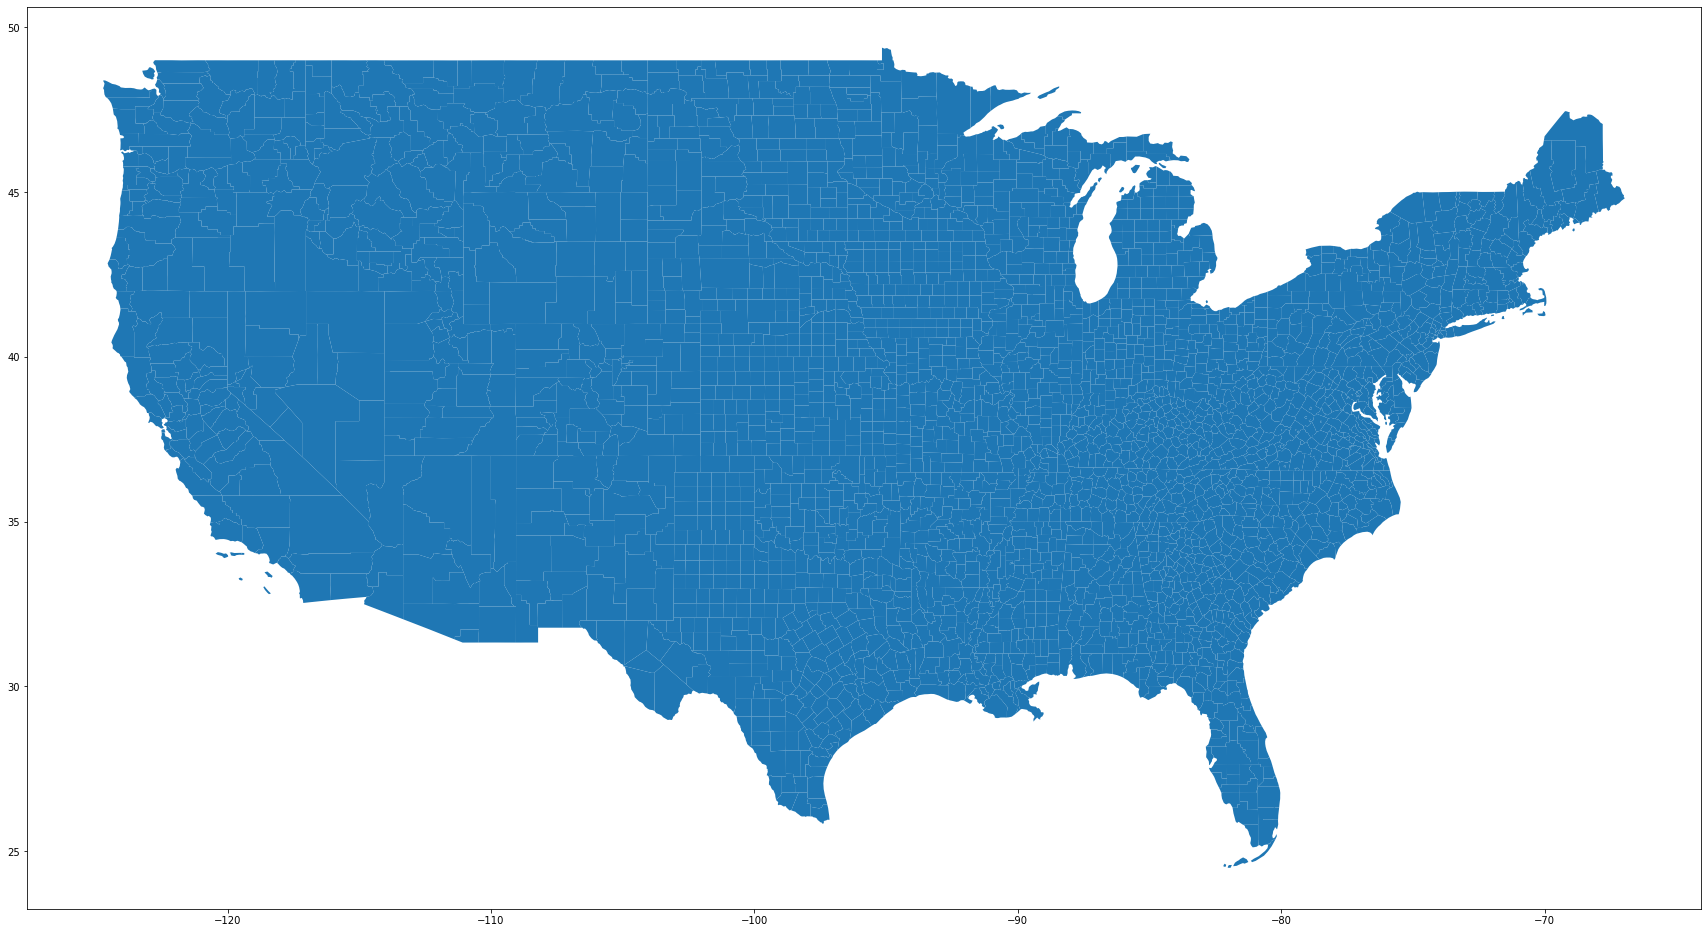

In [42]:
lonlatinfo.loc[((lonlatinfo['STATEFP'] != 2) & (lonlatinfo['STATEFP'] != 15) &(lonlatinfo['STATEFP'] != 72) )].plot(figsize=(30,20)) #, color='#3B3C6E')

In [9]:
lonlatinfo.sort_values(by=['STATEFP','COUNTYFP'])

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
1158,01,001,00161526,0500000US01001,01001,Autauga,06,1539609015,25749942,"POLYGON ((-86.91759 32.66417, -86.71339 32.661..."
2846,01,003,00161527,0500000US01003,01003,Baldwin,06,4117584019,1133130502,"POLYGON ((-88.02632 30.75336, -87.94455 30.827..."
1115,01,005,00161528,0500000US01005,01005,Barbour,06,2291818680,50864677,"POLYGON ((-85.73573 31.62449, -85.66623 31.772..."
550,01,007,00161529,0500000US01007,01007,Bibb,06,1612481559,9287974,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
2012,01,009,00161530,0500000US01009,01009,Blount,06,1670041875,15077458,"POLYGON ((-86.96336 33.85822, -86.92439 33.909..."
...,...,...,...,...,...,...,...,...,...,...
3,72,145,01804553,0500000US72145,72145,Vega Baja,13,118766803,57805868,"POLYGON ((-66.44899 18.38721, -66.43895 18.481..."
1508,72,147,01804554,0500000US72147,72147,Vieques,13,131527813,552206400,"POLYGON ((-65.57686 18.10322, -65.50592 18.152..."
601,72,149,01804555,0500000US72149,72149,Villalba,13,92298573,3622637,"POLYGON ((-66.52190 18.15195, -66.47055 18.177..."
1881,72,151,01804556,0500000US72151,72151,Yabucoa,13,143005178,72592521,"POLYGON ((-66.01024 18.07556, -65.93317 18.093..."


In [11]:
#from shapely.geometry import Point, Polygon
lonlatinfo['Center_point'] = lonlatinfo['geometry'].centroid
#Extract lat and lon from the centerpoint
lonlatinfo["lat"] = lonlatinfo.Center_point.map(lambda p: p.x)
lonlatinfo["lon"] = lonlatinfo.Center_point.map(lambda p: p.y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [14]:
lonlatinfo

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Center_point,lat,lon
0,39,131,01074078,0500000US39131,39131,Pike,06,1140324458,9567612,"POLYGON ((-83.35353 39.19758, -82.78589 39.168...",POINT (-83.06770 39.07634),-83.067696,39.076340
1,46,3,01266983,0500000US46003,46003,Aurora,06,1834813753,11201379,"POLYGON ((-98.80777 43.93522, -98.33151 43.937...",POINT (-98.56051 43.71758),-98.560506,43.717576
2,55,35,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",POINT (-91.28609 44.72661),-91.286092,44.726614
3,72,145,01804553,0500000US72145,72145,Vega Baja,13,118766803,57805868,"POLYGON ((-66.44899 18.38721, -66.43895 18.481...",POINT (-66.39840 18.42641),-66.398401,18.426414
4,48,259,01383915,0500000US48259,48259,Kendall,06,1715747531,1496797,"POLYGON ((-98.92015 30.13829, -98.58790 30.138...",POINT (-98.71136 29.94566),-98.711360,29.945661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,13,147,01687995,0500000US13147,13147,Hart,06,601908708,63583341,"POLYGON ((-83.09424 34.41590, -83.05057 34.495...",POINT (-82.96568 34.34627),-82.965677,34.346270
3216,22,101,01629492,0500000US22101,22101,St. Mary,15,1438845622,1460445312,"POLYGON ((-91.93529 29.67194, -91.71115 29.846...",POINT (-91.44701 29.69261),-91.447014,29.692610
3217,6,79,00277304,0500000US06079,06079,San Luis Obispo,06,8548640337,815490673,"POLYGON ((-121.34705 35.79519, -120.75065 35.7...",POINT (-120.40388 35.38821),-120.403880,35.388210
3218,41,19,01135849,0500000US41019,41019,Douglas,06,13042299244,252000831,"POLYGON ((-124.19346 43.70608, -124.16021 43.8...",POINT (-123.16729 43.27941),-123.167291,43.279413


In [12]:
test = lonlatinfo.dissolve(by='STATEFP')
test.dissolve(by='COUNTYFP')
test[:10]

,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Center_point,lat,lon
STATEFP,,,,,,,,,,,,
01,"POLYGON ((-85.12544 31.76297, -85.11893 31.732...",053,00161552,0500000US01053,01053,Escambia,06,2447747107,20872955,POINT (-87.15919 31.12568),-87.159187,31.125679
02,"MULTIPOLYGON (((-179.17426 51.27906, -178.9955...",060,01419967,0500000US02060,02060,Bristol Bay,04,1304965763,993835732,POINT (-156.70442 58.74426),-156.704424,58.744262
04,"POLYGON ((-109.04761 32.42638, -109.04830 32.0...",011,00042807,0500000US04011,04011,Greenlee,06,4770701093,13750448,POINT (-109.24053 33.21499),-109.240528,33.214988
05,"POLYGON ((-90.94480 34.11666, -90.94632 34.109...",027,00063761,0500000US05027,05027,Columbia,06,1984105630,1774699,POINT (-93.22643 33.21231),-93.226428,33.212307
06,"MULTIPOLYGON (((-118.59403 33.03595, -118.5400...",075,00277302,0500000US06075,06075,San Francisco,06,121455687,479136515,POINT (-122.43857 37.75215),-122.438567,37.752151
08,"POLYGON ((-102.04189 37.64428, -102.04194 37.3...",035,00198133,0500000US08035,08035,Douglas,06,2176272717,6752511,POINT (-104.93000 39.33134),-104.930001,39.331338
09,"POLYGON ((-73.69594 41.11526, -73.48271 41.212...",001,00212794,0500000US09001,09001,Fairfield,06,1618664453,549280549,POINT (-73.38824 41.26723),-73.388236,41.267233
10,"POLYGON ((-75.30665 38.94766, -75.30255 38.939...",003,00217270,0500000US10003,10003,New Castle,06,1104159377,175370515,POINT (-75.64056 39.57994),-75.640556,39.579943
11,"POLYGON ((-77.11976 38.93434, -77.04102 38.995...",001,01702382,0500000US11001,11001,District of Columbia,00,158364992,18633403,POINT (-77.01656 38.90418),-77.016560,38.904178


## 2-3. processing two data

In [ ]:
yr_mean_temp = np.mean(mon_temp['tdmean_prism'], axis=1)
yr_mean_temp.shape

yr_accu_pr = np.sum(mon_precip['ppt_prism'],axis=1)
yr_accu_pr.shape 

(3220, 36)

In [16]:
## growing season fixed for corn: march to august (based on Schlenker et al., 2009 - non_linearlity paper)
yr_gs_mean_temp = np.mean(mon_temp['tdmean_prism'][:,3:9,:], axis=1)
yr_gs_mean_temp.shape

yr_gs_accu_pr = np.sum(mon_precip['ppt_prism'][:,3:9,:],axis=1)
yr_gs_accu_pr.shape 

(3220, 36)

In [53]:
print(len(np.unique(np.where(np.isnan(yr_gs_mean_temp) == True)[0])))
print(np.where(np.isnan(yr_gs_mean_temp) == True))
print(np.where(np.isnan(yr_gs_accu_pr) == True))


114
(array([   3,    3,    3, ..., 3203, 3203, 3203]), array([ 0,  1,  2, ..., 33, 34, 35]))
(array([   3,    3,    3, ..., 3203, 3203, 3203]), array([ 0,  1,  2, ..., 33, 34, 35]))


In [10]:
lonlatinfo['COUNTYFP'] = lonlatinfo['COUNTYFP'].astype(int)
lonlatinfo['STATEFP'] = lonlatinfo['STATEFP'].astype(int)

In [34]:
## here growing season!!
for i in range(3220):
  my_dict = dict(state_id =lonlatinfo['STATEFP'][i], county_name = lonlatinfo['NAME'][i], county_id=lonlatinfo['COUNTYFP'][i],mlat = lonlatinfo['lat'][i], mlon= lonlatinfo['lon'][i],
                 year=time1,yearly_gs_mean_temp = yr_gs_mean_temp[i,:], yearly_gs_accum_precip=yr_gs_accu_pr[i,:])
  dataframe_temp = pd.DataFrame.from_dict(my_dict)
      
  if i == 0:
    dataframe1 = dataframe_temp
  else:
    dataframe1 = dataframe1.append(dataframe_temp,ignore_index=True, sort=False)

In [29]:
dataframe1.sort_values(by =['state_id','county_id'])

,state_id,county_name,county_id,year,yearly_gs_mean_temp,yearly_gs_accum_precip
41688,1,Autauga,1,1981-12-31,16.960268,553.150575
41689,1,Autauga,1,1982-12-31,16.445766,620.674483
41690,1,Autauga,1,1983-12-31,15.492126,777.169194
41691,1,Autauga,1,1984-12-31,15.709981,617.974827
41692,1,Autauga,1,1985-12-31,16.731494,576.495288
...,...,...,...,...,...,...
84703,72,Yauco,153,2012-12-31,NaN,NaN
84704,72,Yauco,153,2013-12-31,NaN,NaN
84705,72,Yauco,153,2014-12-31,NaN,NaN
84706,72,Yauco,153,2015-12-31,NaN,NaN


In [35]:
dataframe1.to_csv('/content/drive/My Drive/prism_yearly_gs_weather_with_lonlatfromshape_withlatlon.csv')


In [6]:
dataframe1 = pd.read_csv('/content/drive/My Drive/prism_yearly_gs_weather_with_lonlatfromshape_withlatlon.csv',index_col=[0])
dataframe1.loc[dataframe1['yearly_gs_mean_temp'].isnull()]

,state_id,county_name,county_id,mlat,mlon,year,yearly_gs_mean_temp,yearly_gs_accum_precip
108,72,Vega Baja,145,-66.398401,18.426414,1981-12-31,NaN,NaN
109,72,Vega Baja,145,-66.398401,18.426414,1982-12-31,NaN,NaN
110,72,Vega Baja,145,-66.398401,18.426414,1983-12-31,NaN,NaN
111,72,Vega Baja,145,-66.398401,18.426414,1984-12-31,NaN,NaN
112,72,Vega Baja,145,-66.398401,18.426414,1985-12-31,NaN,NaN
...,...,...,...,...,...,...,...,...
115339,2,Wrangell,275,-132.053559,56.314197,2012-12-31,NaN,NaN
115340,2,Wrangell,275,-132.053559,56.314197,2013-12-31,NaN,NaN
115341,2,Wrangell,275,-132.053559,56.314197,2014-12-31,NaN,NaN
115342,2,Wrangell,275,-132.053559,56.314197,2015-12-31,NaN,NaN


In [11]:
len(dataframe1['county_name'])/36,len(lonlatinfo['NAME'])

(3220.0, 3220)

#3. Combining all data

In [41]:
dataframe1.sort_values(by=['state_id','county_id'])
#print(sorted_dataframe1[:20])
dataframe1['year'] = pd.to_datetime(dataframe1['year'])
dataframe['year'] = pd.to_datetime(dataframe['year'])

In [47]:
#@title
combined = pd.merge(dataframe,dataframe1,how='outer',on=['state_id','county_name','county_id','year'])
combined['year'] = pd.to_datetime(combined['year'])
test = combined.loc[(combined['year'] > pd.to_datetime('1980-12-31')) & (combined['year'] < pd.to_datetime('2017-12-31'))]
test.loc[test['yearly_gs_mean_temp'].isnull()]

,state_name,state_id,county_name,county_id,lat,lon,year,corn_yld,corn_area,mlat,mlon,yearly_gs_mean_temp,yearly_gs_accum_precip
59141,IL,17,La Salle,99,41.330312,-88.901135,1981-12-31,130.0,317400.0,NaN,NaN,NaN,NaN
59142,IL,17,La Salle,99,41.330312,-88.901135,1982-12-31,136.0,312300.0,NaN,NaN,NaN,NaN
59143,IL,17,La Salle,99,41.330312,-88.901135,1983-12-31,95.0,230200.0,NaN,NaN,NaN,NaN
59144,IL,17,La Salle,99,41.330312,-88.901135,1984-12-31,123.0,304400.0,NaN,NaN,NaN,NaN
59145,IL,17,La Salle,99,41.330312,-88.901135,1985-12-31,140.0,311400.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325589,NaN,2,Wrangell,275,NaN,NaN,2012-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN
325590,NaN,2,Wrangell,275,NaN,NaN,2013-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN
325591,NaN,2,Wrangell,275,NaN,NaN,2014-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN
325592,NaN,2,Wrangell,275,NaN,NaN,2015-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN


In [15]:
#@title

#combined1 = pd.merge(dataframe,dataframe1,how='outer',on=['state_id','county_name','county_id','year'],indicator=True)
combined1['year'] = pd.to_datetime(combined1['year'])
test1 = combined1.loc[(combined1['year'] > pd.to_datetime('1980-12-31')) & (combined1['year'] < pd.to_datetime('2017-12-31'))]
test1.loc[test1['yearly_gs_mean_temp'].isnull()]

,state_name,state_id,county_name,county_id,lat,lon,year,corn_yld,corn_area,mlat,mlon,yearly_gs_mean_temp,yearly_gs_accum_precip,_merge
59141,IL,17,La Salle,99,41.330312,-88.901135,1981-12-31,130.0,317400.0,NaN,NaN,NaN,NaN,left_only
59142,IL,17,La Salle,99,41.330312,-88.901135,1982-12-31,136.0,312300.0,NaN,NaN,NaN,NaN,left_only
59143,IL,17,La Salle,99,41.330312,-88.901135,1983-12-31,95.0,230200.0,NaN,NaN,NaN,NaN,left_only
59144,IL,17,La Salle,99,41.330312,-88.901135,1984-12-31,123.0,304400.0,NaN,NaN,NaN,NaN,left_only
59145,IL,17,La Salle,99,41.330312,-88.901135,1985-12-31,140.0,311400.0,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325589,NaN,2,Wrangell,275,NaN,NaN,2012-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only
325590,NaN,2,Wrangell,275,NaN,NaN,2013-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only
325591,NaN,2,Wrangell,275,NaN,NaN,2014-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only
325592,NaN,2,Wrangell,275,NaN,NaN,2015-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only


In [88]:
'''this is the final code to combine two datasets
1) remove the space in county names in both dataframes
2) combine in outer form to include new data in both dataframes
3) verify merge types with the final data and original data '''

dataframe1['county_name'] = dataframe1['county_name'].str.replace(' ', '')
dataframe['county_name'] = dataframe['county_name'].str.replace(' ', '')

combined2 = pd.merge(dataframe,dataframe1,how='outer',on=['state_id','county_name','county_id','year'],indicator=True)
combined2['year'] = pd.to_datetime(combined2['year'])
test2 = combined2.loc[(combined2['year'] > pd.to_datetime('1980-12-31')) & (combined2['year'] < pd.to_datetime('2017-12-31'))]
test2.loc[test2['yearly_gs_mean_temp'].isnull()]

,state_name,state_id,county_name,county_id,lat,lon,year,corn_yld,corn_area,mlat,mlon,yearly_gs_mean_temp,yearly_gs_accum_precip,_merge
244491,SD,46,Shannon,113,43.460404,-102.580196,1981-12-31,78.0,200.0,NaN,NaN,NaN,NaN,left_only
244492,SD,46,Shannon,113,43.460404,-102.580196,1982-12-31,52.0,500.0,NaN,NaN,NaN,NaN,left_only
244493,SD,46,Shannon,113,43.460404,-102.580196,1983-12-31,80.0,400.0,NaN,NaN,NaN,NaN,left_only
244494,SD,46,Shannon,113,43.460404,-102.580196,1984-12-31,75.0,200.0,NaN,NaN,NaN,NaN,left_only
244495,SD,46,Shannon,113,43.460404,-102.580196,1985-12-31,70.0,400.0,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325481,NaN,2,Wrangell,275,NaN,NaN,2012-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only
325482,NaN,2,Wrangell,275,NaN,NaN,2013-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only
325483,NaN,2,Wrangell,275,NaN,NaN,2014-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only
325484,NaN,2,Wrangell,275,NaN,NaN,2015-12-31,NaN,NaN,-132.053559,56.314197,NaN,NaN,right_only


In [ ]:
combined2.to_csv('/content/drive/My Drive/combined_corn_growing_season_county_levels_indicators.csv')
#combined1 = pd.read_csv('/content/drive/My Drive/combined_corn_growing_season_county_levels_indicators.csv',index_col=[0])

In [87]:
test2.loc[test2['_merge'] =='left_only']#, #14076/36, #test2.loc[test2['_merge'] =='left_only']

,state_name,state_id,county_name,county_id,lat,lon,year,corn_yld,corn_area,mlat,mlon,yearly_gs_mean_temp,yearly_gs_accum_precip,_merge
244491,SD,46,Shannon,113,43.460404,-102.580196,1981-12-31,78.0,200.0,NaN,NaN,NaN,NaN,left_only
244492,SD,46,Shannon,113,43.460404,-102.580196,1982-12-31,52.0,500.0,NaN,NaN,NaN,NaN,left_only
244493,SD,46,Shannon,113,43.460404,-102.580196,1983-12-31,80.0,400.0,NaN,NaN,NaN,NaN,left_only
244494,SD,46,Shannon,113,43.460404,-102.580196,1984-12-31,75.0,200.0,NaN,NaN,NaN,NaN,left_only
244495,SD,46,Shannon,113,43.460404,-102.580196,1985-12-31,70.0,400.0,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290942,VA,51,Bedford,515,37.333205,-79.534619,2012-12-31,0.0,0.0,NaN,NaN,NaN,NaN,left_only
290943,VA,51,Bedford,515,37.333205,-79.534619,2013-12-31,135.7,700.0,NaN,NaN,NaN,NaN,left_only
290944,VA,51,Bedford,515,37.333205,-79.534619,2014-12-31,132.5,400.0,NaN,NaN,NaN,NaN,left_only
290945,VA,51,Bedford,515,37.333205,-79.534619,2015-12-31,136.6,410.0,NaN,NaN,NaN,NaN,left_only


In [80]:
dataframe.loc[(dataframe['county_id'] == 600) & (dataframe['state_id']==51)]

,state_name,state_id,county_name,county_id,lat,lon,year,corn_yld,corn_area


In [82]:
dataframe1.loc[(dataframe1['county_id'] == 600) & (dataframe1['state_id']==51) ]
#dataframe1.loc[(dataframe1['county_id'] == 'Bedfordcity')]

,state_id,county_name,county_id,mlat,mlon,year,yearly_gs_mean_temp,yearly_gs_accum_precip
82620,51,Fairfax,600,-77.295024,38.851803,1981-12-31,13.169166,620.344999
82621,51,Fairfax,600,-77.295024,38.851803,1982-12-31,12.367500,598.494999
82622,51,Fairfax,600,-77.295024,38.851803,1983-12-31,12.309167,669.635006
82623,51,Fairfax,600,-77.295024,38.851803,1984-12-31,12.727500,607.044991
82624,51,Fairfax,600,-77.295024,38.851803,1985-12-31,12.630000,494.740002
82625,51,Fairfax,600,-77.295024,38.851803,1986-12-31,12.745000,416.584998
82626,51,Fairfax,600,-77.295024,38.851803,1987-12-31,13.548333,548.019999
82627,51,Fairfax,600,-77.295024,38.851803,1988-12-31,12.145000,485.039997
82628,51,Fairfax,600,-77.295024,38.851803,1989-12-31,13.664167,660.454998
82629,51,Fairfax,600,-77.295024,38.851803,1990-12-31,13.153333,671.369998


In [93]:
#len(test1['county_id'])/36
test2 = dataframe[['state_id','county_id','county_name']]
test2 = test2.drop_duplicates(subset=None, keep='first', inplace=False)
print(test2)

test3 = dataframe1[['state_id','county_id','county_name']]
test3 = test3.drop_duplicates(subset=None, keep='first', inplace=False)
print(test3.sort_values(by=['state_id','county_id']))

        state_id  county_id county_name
0              1          1     Autauga
110            1          3     Baldwin
220            1          5     Barbour
330            1          7        Bibb
440            1          9      Blount
...          ...        ...         ...
310860        56         31      Platte
310970        56         33    Sheridan
311080        56         41       Uinta
311190        56         43    Washakie
311300        56         45      Weston

[2831 rows x 3 columns]
        state_id  county_id county_name
41688          1          1     Autauga
102456         1          3     Baldwin
40140          1          5     Barbour
19800          1          7        Bibb
72432          1          9      Blount
...          ...        ...         ...
108           72        145   Vega Baja
54288         72        147     Vieques
21636         72        149    Villalba
67716         72        151     Yabucoa
84672         72        153       Yauco

[3220 rows x 3